Architecture of a neural netwrok regression.
1. Input layer shape - Same shape as number of features.
2. Hidden layer - minimum:1 , maximum: unlimited.
3. Neurons per hidden layer - Problem specific, generally 10 to 100.
4. Output layer shape : Same shape as desired predition shape.
5. Hidden activation - Usually ReLU
6. Output activation - None, ReLU, logistic/tanh
7. Loss function - MSE, MAE if outliers
8. Optimizer - SGD, Adam

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

## Steps in modelling with tensorflow
1. **Creating a model** - define the input and output layers as well as the hidden layers.
2. **Compiling a model** - define the loss function, optimizer, evaluation metrics.
3. Fitting a model - Letting a model to try to find patterns between features and labels.

In [3]:
import numpy as np
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array( [3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [4]:
tf.random.set_seed(42)

#create a model using sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#Compiling model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 17.4789 - mae: 17.4789
Epoch 2/10
1/1 [==============================] - 0s 25ms/step - loss: 17.1976 - mae: 17.1976
Epoch 3/10
1/1 [==============================] - 0s 17ms/step - loss: 16.9164 - mae: 16.9164
Epoch 4/10
1/1 [==============================] - 0s 24ms/step - loss: 16.6351 - mae: 16.6351
Epoch 5/10
1/1 [==============================] - 0s 37ms/step - loss: 16.3539 - mae: 16.3539
Epoch 6/10
1/1 [==============================] - 0s 16ms/step - loss: 16.0726 - mae: 16.0726
Epoch 7/10
1/1 [==============================] - 0s 16ms/step - loss: 15.7914 - mae: 15.7914
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 15.5101 - mae: 15.5101
Epoch 9/10
1/1 [==============================] - 0s 22ms/step - loss: 15.2289 - mae: 15.2289
Epoch 10/10
1/1 [==============================] - 0s 55ms/step - loss: 14.9476 - mae: 14.9476


In [5]:
model.predict([17.0])

1/1 [==============================] - 1s 511ms/step


array([[-6.3126116]], dtype=float32)

### Improving the model

1. Creating a model - Here we can **add more layers**, increase the number of hidden units with each of the hidden layers, **change the activation functions** of each layer.
2. Compiling a model - Change the optimization function or maybe the **learning rate** of the function.
3. Fitting a model - Fit the model for **more epochs**.


The lower the learning rate, the smaller the steps the optimizer tells the neural network to improve.

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 941ms/step - loss: 11.6335 - mae: 11.6335
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 11.5010 - mae: 11.5010
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 11.3685 - mae: 11.3685
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 11.2360 - mae: 11.2360
Epoch 5/100
1/1 [==============================] - 0s 40ms/step - loss: 11.1035 - mae: 11.1035
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 10.9710 - mae: 10.9710
Epoch 7/100
1/1 [==============================] - 0s 34ms/step - loss: 10.8385 - mae: 10.8385
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 10.7060 - mae: 10.7060
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 10.5735 - mae: 10.5735
Epoch 10/100
1/1 [==============================] - 0s 47ms/step - loss: 10.4410 - mae: 10.4410
Epoch 11/100
1/1 [==============================

In [7]:
model.predict([17.0])

1/1 [==============================] - 0s 137ms/step


array([[30.130924]], dtype=float32)

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 968ms/step - loss: 13.8257 - mae: 13.8257
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 13.3757 - mae: 13.3757
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 12.9257 - mae: 12.9257
Epoch 4/100
1/1 [==============================] - 0s 27ms/step - loss: 12.4757 - mae: 12.4757
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 12.0257 - mae: 12.0257
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 11.5757 - mae: 11.5757
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 11.1257 - mae: 11.1257
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 10.6757 - mae: 10.6757
Epoch 9/100
1/1 [==============================] - 0s 40ms/step - loss: 10.2257 - mae: 10.2257
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 9.7757 - mae: 9.7757
Epoch 11/100
1/1 [==============================] 

In [9]:
model.predict([17.0])

1/1 [==============================] - 0s 218ms/step


array([[27.37003]], dtype=float32)

### Evaluating the model


In [10]:
X = tf.range(-100, 100, 4)
y = X+10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

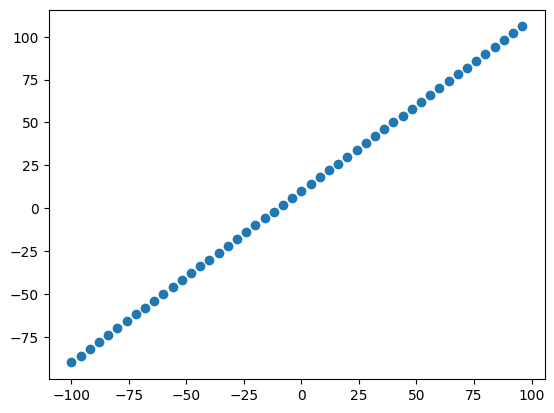

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X, y);

Train, test and validation sets.


In [12]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

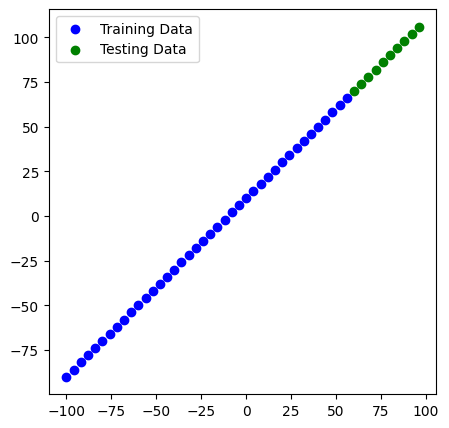

In [16]:
plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, c='b', label="Training Data")
plt.scatter(X_test, y_test, c='g', label="Testing Data")
plt.legend();

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])
#model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

In [27]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


1. Total params - total number of parameters in the model.
2. Trainable parameters - parameters the model can update as it trains.
3. Non-trainable parameters - parameters that aren't updated during training.

In [28]:
model.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100, verbose=2)

Epoch 1/100
2/2 - 1s - loss: 13.0418 - mae: 13.0418 - 689ms/epoch - 344ms/step
Epoch 2/100
2/2 - 0s - loss: 8.3536 - mae: 8.3536 - 11ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 10.1286 - mae: 10.1286 - 11ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 10.2461 - mae: 10.2461 - 11ms/epoch - 5ms/step
Epoch 5/100
2/2 - 0s - loss: 7.8602 - mae: 7.8602 - 11ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 7.8418 - mae: 7.8418 - 11ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 8.5824 - mae: 8.5824 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 8.0364 - mae: 8.0364 - 15ms/epoch - 7ms/step
Epoch 9/100
2/2 - 0s - loss: 6.9888 - mae: 6.9888 - 13ms/epoch - 7ms/step
Epoch 10/100
2/2 - 0s - loss: 7.1631 - mae: 7.1631 - 13ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 7.4373 - mae: 7.4373 - 10ms/epoch - 5ms/step
Epoch 12/100
2/2 - 0s - loss: 6.5342 - mae: 6.5342 - 12ms/epoch - 6ms/step
Epoch 13/100
2/2 - 0s - loss: 6.2148 - mae: 6.2148 - 13ms/epoch - 6ms/step
Epoch 14/100
2/2 - 0s - l

In [29]:
model.predict([20.0])

1/1 [==============================] - 0s 330ms/step


array([[29.952517]], dtype=float32)